In [8]:
import geopandas as gpd
import pandas as pd
housing_shp=gpd.read_file("data/california_housing.shp")

<AxesSubplot:>

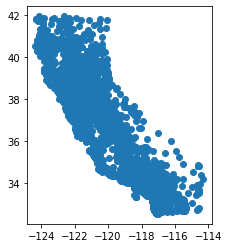

In [3]:
housing_shp.plot()

array([[<AxesSubplot:title={'center':'total_room'}>,
        <AxesSubplot:title={'center':'total_bedr'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_inc'}>,
        <AxesSubplot:title={'center':'house_age'}>],
       [<AxesSubplot:title={'center':'median_val'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

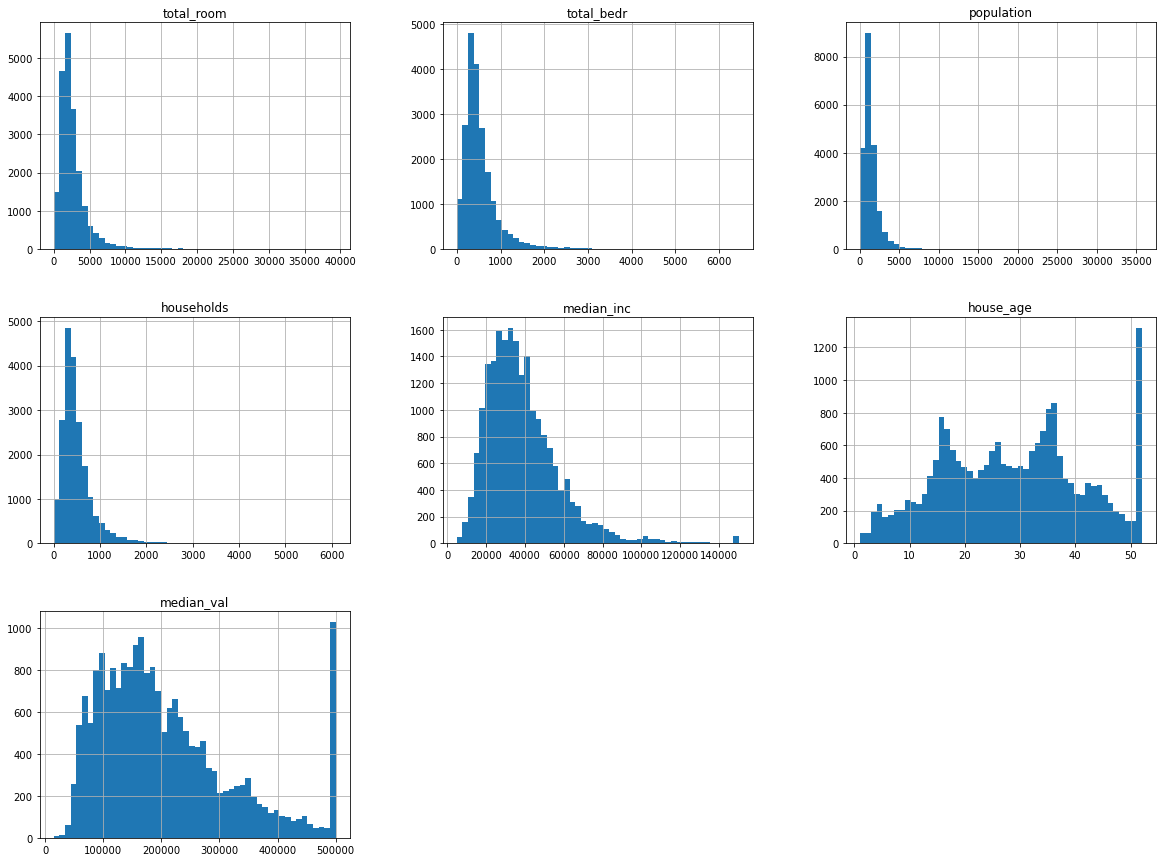

In [4]:
housing_shp.hist(bins=50, figsize=(20,15))

In [12]:
housing_shp["house_age"].max()
housing_shp_cleaned = housing_shp[housing_shp["house_age"] < 52]

In [15]:
housing_shp_cleaned["median_val"].max()
housing_shp_cleaned = housing_shp_cleaned[housing_shp_cleaned["median_val"] < 500001.0]

array([[<AxesSubplot:title={'center':'total_room'}>,
        <AxesSubplot:title={'center':'total_bedr'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_inc'}>,
        <AxesSubplot:title={'center':'house_age'}>],
       [<AxesSubplot:title={'center':'median_val'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

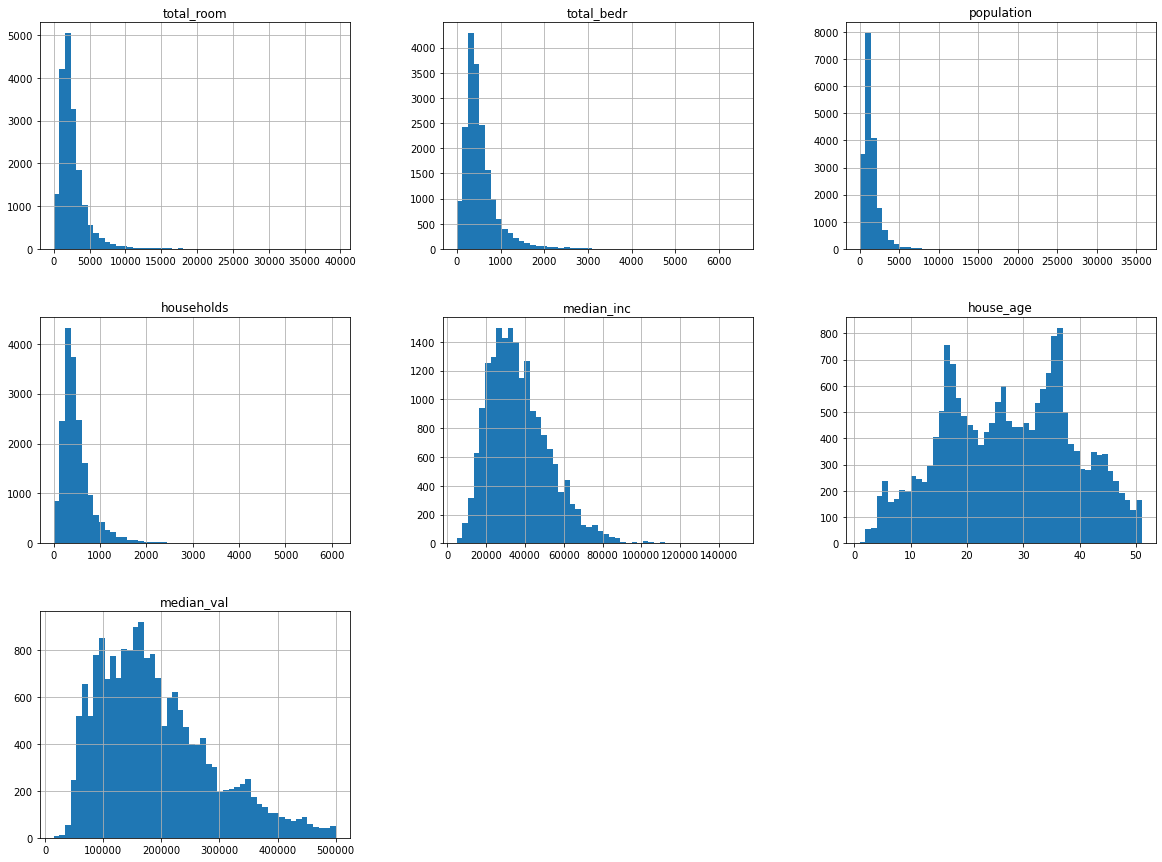

In [16]:
housing_shp_cleaned.hist(bins=50, figsize=(20,15))

In [17]:
housing_shp_cleaned["ocean_prox"].unique()
housing_shp_cleaned = pd.get_dummies(housing_shp_cleaned)

In [18]:
training_data = housing_shp_cleaned.sample(frac=0.8, random_state=42)
test_data = housing_shp_cleaned.drop(training_data.index)

In [62]:
training_X=training_data[training_data.columns.drop(['median_val','geometry'])]
training_y = training_data["median_val"]

In [63]:
training_X.head()

,total_room,total_bedr,population,households,median_inc,house_age,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
12869,4842.0,935.0,2857.0,907.0,39318.0,7.0,0,1,0,0,0
8961,593.0,137.0,371.0,132.0,46932.0,40.0,1,0,0,0,0
20309,1612.0,334.0,1431.0,335.0,48125.0,22.0,0,0,0,0,1
17392,2121.0,445.0,2211.0,463.0,40603.0,21.0,1,0,0,0,0
6961,3531.0,754.0,1613.0,697.0,32359.0,36.0,1,0,0,0,0


In [64]:
def standardize_data(data, stats):
    return (data - stats['mean'])/stats['std']

In [66]:
training_stats = training_X.describe().transpose()
training_stats

,count,mean,std,min,25%,50%,75%,max
total_room,14858.0,2668.450128,2253.243630,2.0,1444.00,2137.0,3192.75,39320.0
total_bedr,14858.0,541.619262,435.084160,0.0,294.00,436.0,656.00,6445.0
population,14858.0,1469.974896,1183.121367,3.0,805.25,1201.0,1777.00,35682.0
households,14858.0,508.484386,394.538475,2.0,282.00,415.0,615.00,6082.0
median_inc,14858.0,36912.562996,15674.248967,4999.0,25386.25,34643.0,46111.00,150001.0
house_age,14858.0,26.971934,11.469346,1.0,17.00,27.0,36.00,51.0
ocean_prox_<1H OCEAN,14858.0,0.446965,0.497196,0.0,0.00,0.0,1.00,1.0
ocean_prox_INLAND,14858.0,0.341163,0.474116,0.0,0.00,0.0,1.00,1.0
ocean_prox_ISLAND,14858.0,0.000135,0.011602,0.0,0.00,0.0,0.00,1.0
ocean_prox_NEAR BAY,14858.0,0.085880,0.280196,0.0,0.00,0.0,0.00,1.0


In [95]:
training_X_std = standardize_data(training_X, training_stats)
training_X_std.head()

,total_room,total_bedr,population,households,median_inc,house_age,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
12869,0.964632,0.904149,1.172344,1.010080,0.153464,-1.741332,-0.898971,1.389612,-0.011602,-0.306499,-0.379433
8961,-0.921094,-0.929979,-0.928878,-0.954240,0.639229,1.135903,1.112309,-0.719577,-0.011602,-0.306499,-0.379433
20309,-0.468857,-0.477193,-0.032942,-0.439715,0.715341,-0.433498,-0.898971,-0.719577,-0.011602,-0.306499,2.635334
17392,-0.242961,-0.222070,0.626331,-0.115285,0.235446,-0.520687,1.112309,-0.719577,-0.011602,-0.306499,-0.379433
6961,0.382804,0.488137,0.120888,0.477813,-0.290512,0.787147,1.112309,-0.719577,-0.011602,-0.306499,-0.379433


In [96]:
test_X=test_data[test_data.columns.drop(['median_val','geometry'])]
test_y = test_data["median_val"]
test_X_std = standardize_data(test_X, training_stats)
test_X_std.head()

,total_room,total_bedr,population,households,median_inc,house_age,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
21,-0.456875,-0.401346,-0.457244,-0.361142,-1.261787,1.310281,-0.898971,-0.719577,-0.011602,3.262435,-0.379433
25,-0.946835,-0.962157,-0.974520,-0.987190,-0.821383,1.223092,-0.898971,-0.719577,-0.011602,3.262435,-0.379433
28,-0.260269,-0.114045,-0.286509,-0.089939,-1.307148,2.007792,-0.898971,-0.719577,-0.011602,3.262435,-0.379433
32,-0.331278,-0.304813,-0.375257,-0.439715,-1.208579,1.833415,-0.898971,-0.719577,-0.011602,3.262435,-0.379433
34,-0.001531,0.074424,-0.179166,0.069741,-0.613080,2.094981,-0.898971,-0.719577,-0.011602,3.262435,-0.379433


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [84]:
linear_model = LinearRegression()
linear_model.fit(training_X_std, training_y)

LinearRegression()

In [97]:
test_y_pred = linear_model.predict(test_X_std)

In [80]:
import matplotlib.pyplot as plt

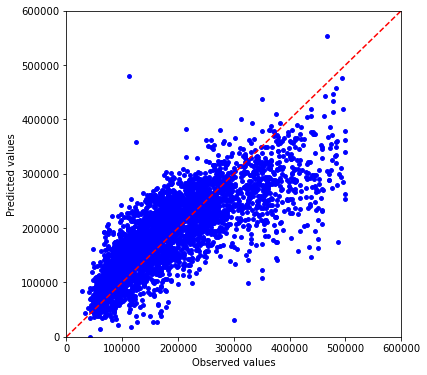

In [94]:
plt.figure(figsize=(6,6))
plt.scatter(test_y,test_y_pred,s=15, c='blue')
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.xlim([0, 600000])
plt.ylim([0, 600000])
plt.plot([0,600000],[0,600000],'r--')

In [89]:
from sklearn.metrics import mean_squared_error

In [91]:
rmse = mean_squared_error(test_y,test_y_pred,squared=False)
rmse

59767.30932360194